# **Impact analysis**

This notebook uses the 4_fullset_RAG.csv from the 4_RAG_and_evaluation that contains the RAG responses with best configuration applied on the 441 companies. This notebook aims to plot the proportion of companies per subregion and sector.

In [3]:
import pandas as pd
import numpy as np

rag_df = pd.read_csv('4_fullset_RAG.csv')

**Chi square test**

The null hypothesis ($H_0$) stated that no association exists between sector and subregion, implying proportional sector representation across all subregions.

In [4]:
from scipy.stats import chi2_contingency
import geopandas

# natural earth map
map_url = "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip"
world = geopandas.read_file(map_url)
world_filtered = world[world["TYPE"].isin(['Country','Sovereign country'])][['ISO_A2_EH', 'SUBREGION', 'geometry']]
rag_df_geo = rag_df.merge(world_filtered, left_on='ISO', right_on='ISO_A2_EH', how='left')


# Create a contingency table of Subregion and Sector
contingency_table = pd.crosstab(rag_df_geo['SUBREGION'], rag_df_geo['Sector'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("--- Chi-square Test Results for Subregion and Sector Distribution ---")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpretation of the results
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p < alpha:
    print("The p-value is less than the significance level.")
    print("We reject the null hypothesis. There is a statistically significant association between Subregion and Sector.")
else:
    print("The p-value is greater than the significance level.")
    print("We fail to reject the null hypothesis. There is no statistically significant association between Subregion and Sector.")

--- Chi-square Test Results for Subregion and Sector Distribution ---
Chi-square statistic: 257.4507
P-value: 0.0423
Degrees of freedom: 220

Expected Frequencies:
Sector                     Aerospace and Defense  Apparel and textiles  \
SUBREGION                                                                
Australia and New Zealand               0.124717              0.022676   
Central America                         0.099773              0.018141   
Eastern Asia                            3.990930              0.725624   
Eastern Europe                          0.149660              0.027211   
Northern America                        3.342404              0.607710   
Northern Europe                         0.598639              0.108844   
South America                           0.174603              0.031746   
South-Eastern Asia                      0.124717              0.022676   
Southern Asia                           0.174603              0.031746   
Southern Europe       

**Cross tabulation of distribution of companies and sector**

/tmp/ipython-input-1339940782.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Sector', data=subregion_data, ax=ax, palette='viridis', legend=False) # Added legend=False
/tmp/ipython-input-1339940782.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Sector', data=subregion_data, ax=ax, palette='viridis', legend=False) # Added legend=False
/tmp/ipython-input-1339940782.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Sector', data=subregion_data, ax=ax, palette='viridis', legend=False) # Ad

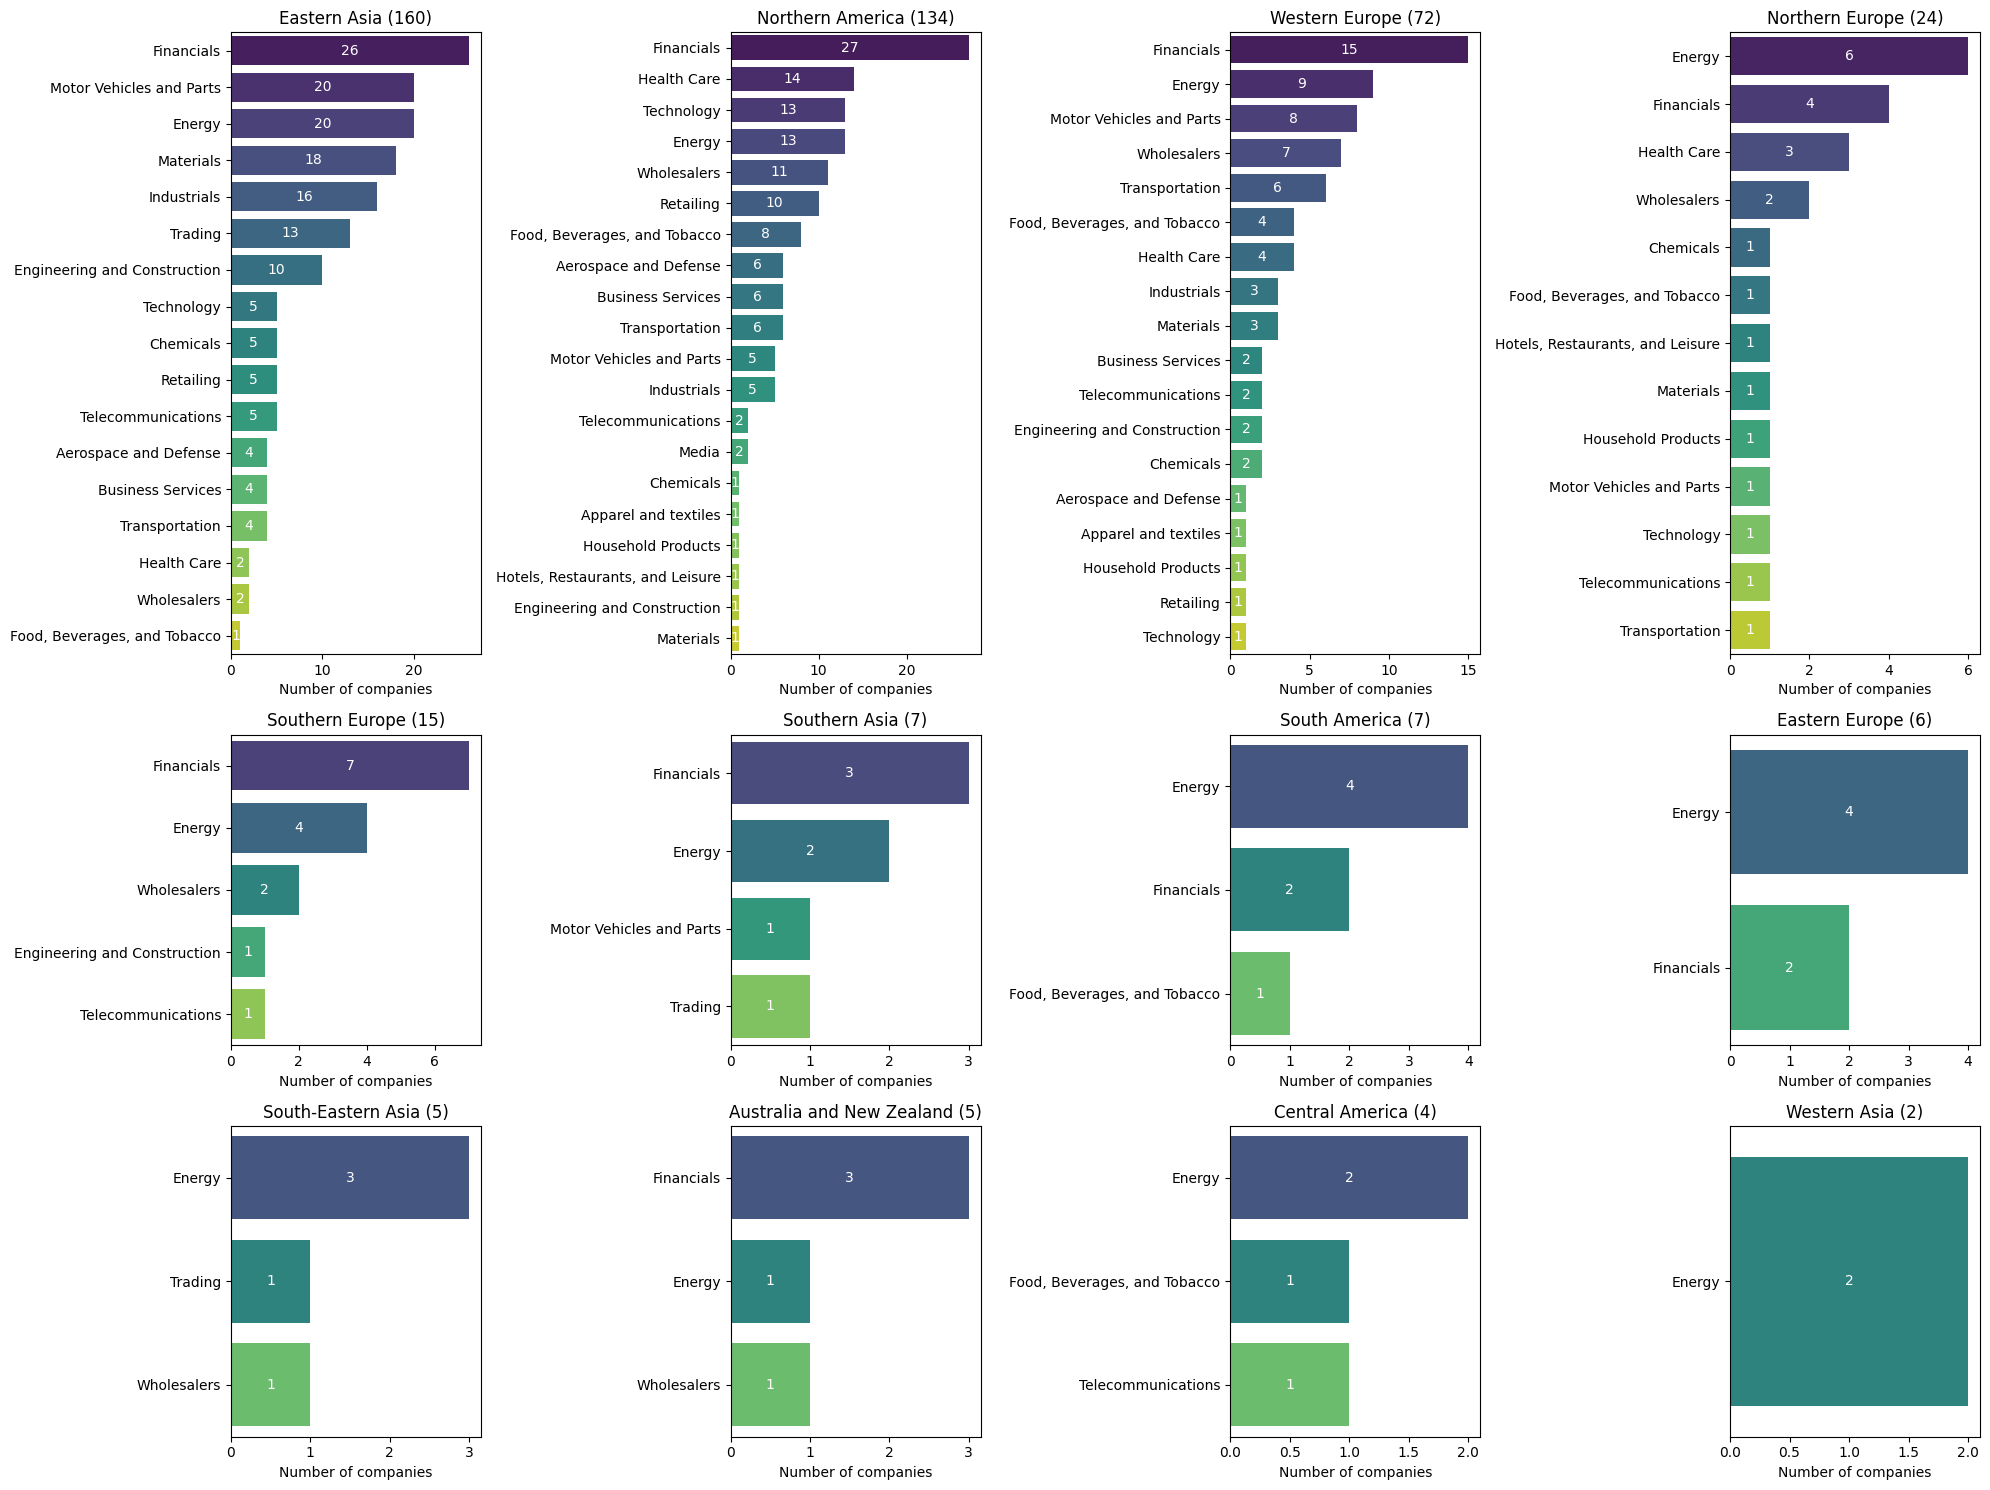

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the specified subregions
selected_subregions = ['Eastern Asia', 'Northern America', 'Northern Europe',
                       'Australia and New Zealand', 'Central America', 'South America',
                       'South-Eastern Asia', 'Southern Asia', 'Southern Europe',
                       'Western Asia', 'Western Europe', 'Eastern Europe']

rag_df_filtered = rag_df_geo[rag_df_geo['SUBREGION'].isin(selected_subregions)].copy()

# Calculate the total number of companies per subregion
subregion_counts = rag_df_filtered['SUBREGION'].value_counts()

# Calculate the number of companies per sector for each selected subregion
sector_counts_per_subregion = rag_df_filtered.groupby(['SUBREGION', 'Sector']).size().reset_index(name='count')

# Define the layout of the subplots
# 4 columns, 3 rows
# First row is longer
fig, axes = plt.subplots(3, 4, figsize=(20, 15), gridspec_kw={'height_ratios': [2, 1, 1]})

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the bar plots for each subregion in the specified order
# Sort the subregions by the total number of companies in descending order
plot_order = subregion_counts.sort_values(ascending=False).index.tolist()


for i, subregion in enumerate(plot_order):
    ax = axes[i]
    # Filter data for the current subregion and sort by count
    subregion_data = sector_counts_per_subregion[sector_counts_per_subregion['SUBREGION'] == subregion].sort_values('count', ascending=False)

    # Get the total number of companies for the subplot title
    total_companies = subregion_counts.get(subregion, 0)

    # Create the bar plot
    sns.barplot(x='count', y='Sector', data=subregion_data, ax=ax, palette='viridis', legend=False) # Added legend=False


    # Set the title with the subregion name and total count
    ax.set_title(f'{subregion} ({total_companies})')

    # Set labels
    ax.set_xlabel('Number of companies')
    ax.set_ylabel('')

    # Add labels to the bars
    for container in ax.containers:
        ax.bar_label(container, label_type='center', color='white', fmt='%.0f')

# Remove any unused subplots
for j in range(len(plot_order), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.savefig('sector_distribution_by_subregion.png')
plt.show()

In [ ]:
#rag_df_geo.to_csv('rag_df_geo.csv', index=False)

**Distribution of risks domains per company**

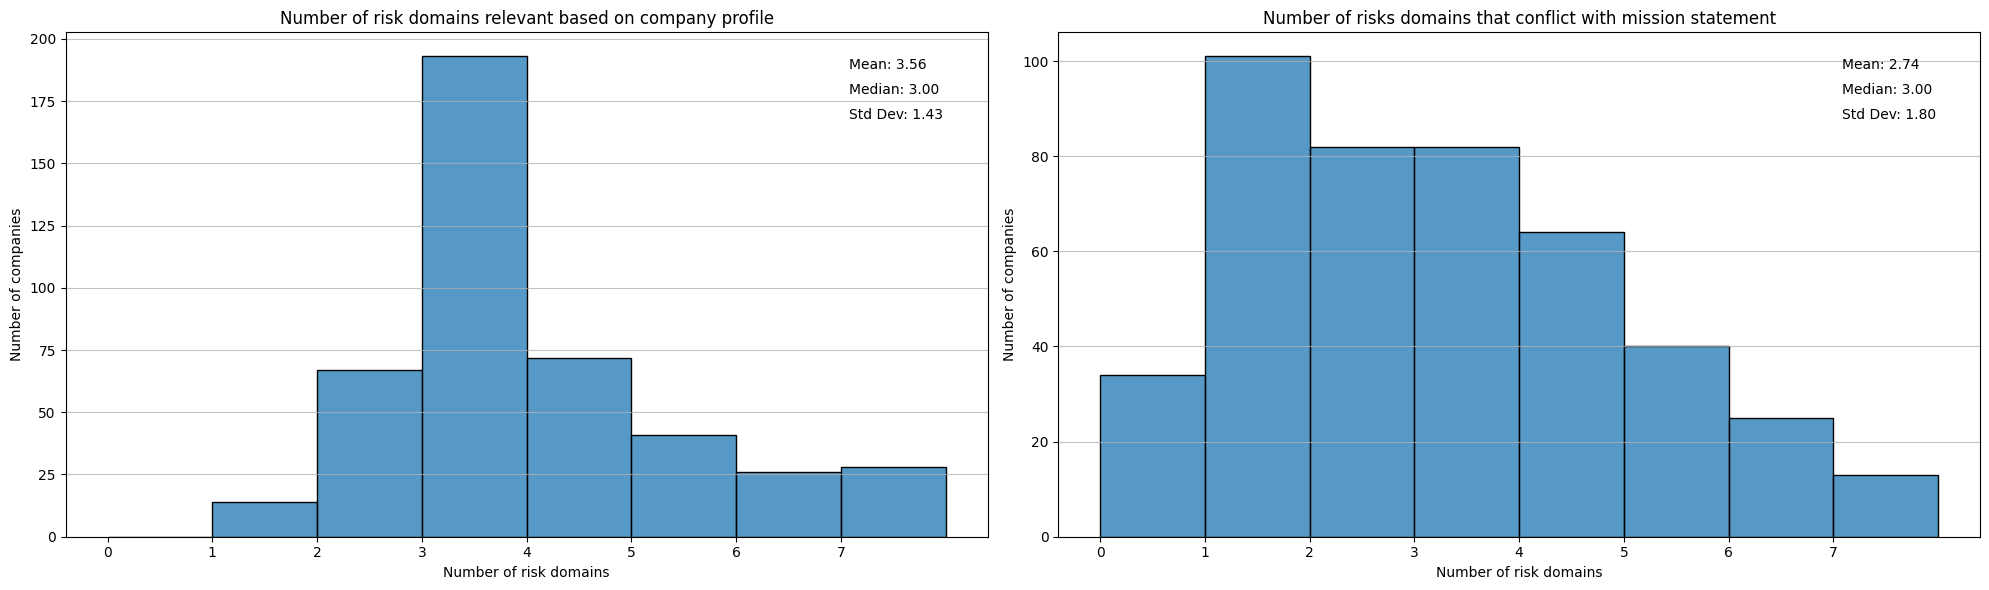


Descriptive Statistics for Number of Risk Domains Selected:
count    441.000000
mean       3.564626
std        1.430518
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: num_risks_domains_k10, dtype: float64

Descriptive Statistics for Number of Conflicting Risk Domains:
count    441.000000
mean       2.739229
std        1.795836
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: num_risks_miss_k10, dtype: float64


In [6]:
import ast
rag_df = rag_df_geo.copy()
# Convert the list-like string columns to actual lists for both columns, handling potential NaNs
rag_df['risks_dom_docs_k10'] = rag_df['risks_dom_docs_k10'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else []
)
rag_df['risks_miss_docs_k10'] = rag_df['risks_miss_docs_k10'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else []
)


# Calculate the number of risk domains for each company for both columns
rag_df['num_risks_domains_k10'] = rag_df['risks_dom_docs_k10'].apply(len)
rag_df['num_risks_miss_k10'] = rag_df['risks_miss_docs_k10'].apply(len)


# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6)) # 1 row, 2 columns

# --- Plot for 'num_risks_domains_k10' ---
max_domains_dom = rag_df['num_risks_domains_k10'].max()
bins_range_dom = range(0, max_domains_dom + 2) if max_domains_dom > 0 else range(0, 2)

ax0 = sns.histplot(data=rag_df, x='num_risks_domains_k10', bins=bins_range_dom, kde=False, ax=axes[0])
axes[0].set_xlabel('Number of risk domains')
axes[0].set_ylabel('Number of companies')
axes[0].set_title('Number of risk domains relevant based on company profile')
axes[0].set_xticks(range(0, max_domains_dom + 1) if max_domains_dom > 0 else range(0, 1))
axes[0].grid(axis='y', alpha=0.75)

# Get descriptive statistics for 'num_risks_domains_k10'
desc_stats_dom = rag_df['num_risks_domains_k10'].describe()
mean_val_dom = desc_stats_dom['mean']
median_val_dom = desc_stats_dom['50%']
std_val_dom = desc_stats_dom['std']


# Add text annotations for descriptive statistics on the first plot
axes[0].text(0.85, 0.95, f'Mean: {mean_val_dom:.2f}', transform=ax0.transAxes, fontsize=10, verticalalignment='top')
axes[0].text(0.85, 0.90, f'Median: {median_val_dom:.2f}', transform=ax0.transAxes, fontsize=10, verticalalignment='top')
axes[0].text(0.85, 0.85, f'Std Dev: {std_val_dom:.2f}', transform=ax0.transAxes, fontsize=10, verticalalignment='top')


max_domains_miss = rag_df['num_risks_miss_k10'].max()
bins_range_miss = range(0, max_domains_miss + 2) if max_domains_miss > 0 else range(0, 2)

ax1 = sns.histplot(data=rag_df, x='num_risks_miss_k10', bins=bins_range_miss, kde=False, ax=axes[1])
axes[1].set_xlabel('Number of risk domains')
axes[1].set_ylabel('Number of companies')
axes[1].set_title('Number of risks domains that conflict with mission statement')
axes[1].set_xticks(range(0, max_domains_miss + 1) if max_domains_miss > 0 else range(0, 1))
axes[1].grid(axis='y', alpha=0.75)

# Get descriptive statistics for 'num_risks_miss_k10'
desc_stats_miss = rag_df['num_risks_miss_k10'].describe()
mean_val_miss = desc_stats_miss['mean']
median_val_miss = desc_stats_miss['50%']
std_val_miss = desc_stats_miss['std']


# Add text annotations for descriptive statistics on the second plot
axes[1].text(0.85, 0.95, f'Mean: {mean_val_miss:.2f}', transform=ax1.transAxes, fontsize=10, verticalalignment='top')
axes[1].text(0.85, 0.90, f'Median: {median_val_miss:.2f}', transform=ax1.transAxes, fontsize=10, verticalalignment='top')
axes[1].text(0.85, 0.85, f'Std Dev: {std_val_miss:.2f}', transform=ax1.transAxes, fontsize=10, verticalalignment='top')


plt.tight_layout()
# Save the combined plot
plt.savefig('risk_histograms.png')
plt.show()



print("\nDescriptive Statistics for Number of Risk Domains Selected:")
print(rag_df['num_risks_domains_k10'].describe())

print("\nDescriptive Statistics for Number of Conflicting Risk Domains:")
print(rag_df['num_risks_miss_k10'].describe())

In [7]:
# risk categories
bins = [-1, 0, 3, 5, 7]

# labels for the categories
labels = ['0', '1-3', '4-5', '6-7']

# Create new columns with the risk categories for both selected and conflicting risks
rag_df['risk_domains_category'] = pd.cut(rag_df['num_risks_domains_k10'], bins=bins, labels=labels, right=True)
rag_df['risks_miss_category'] = pd.cut(rag_df['num_risks_miss_k10'], bins=bins, labels=labels, right=True)

# Display the first few rows to show the new columns
display(rag_df[['num_risks_domains_k10', 'risk_domains_category', 'num_risks_miss_k10', 'risks_miss_category']].head())

,num_risks_domains_k10,risk_domains_category,num_risks_miss_k10,risks_miss_category
0,4,4-5,4,4-5
1,3,1-3,1,1-3
2,4,4-5,4,4-5
3,3,1-3,3,1-3
4,2,1-3,0,0


In [8]:
# Calculate counts for selected risk domains per subregion and category
risk_domains_counts = rag_df.groupby(['SUBREGION', 'risk_domains_category']).size().reset_index(name='count')

# Calculate counts for conflicting risk domains per subregion and category
risks_miss_counts = rag_df.groupby(['SUBREGION', 'risks_miss_category']).size().reset_index(name='count')

/tmp/ipython-input-2949846103.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_domains_counts = rag_df.groupby(['SUBREGION', 'risk_domains_category']).size().reset_index(name='count')
/tmp/ipython-input-2949846103.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risks_miss_counts = rag_df.groupby(['SUBREGION', 'risks_miss_category']).size().reset_index(name='count')


/tmp/ipython-input-3354214727.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  selected_data_pivot = combined_risks_df[combined_risks_df['risk_type'] == 'Selected Risks'].pivot_table(index='Subregion_Label', columns='risk_domains_category', values='proportion', fill_value=0)
/tmp/ipython-input-3354214727.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  conflicting_data_pivot = combined_risks_df[combined_risks_df['risk_type'] == 'Conflicting Risks'].pivot_table(index='Subregion_Label', columns='risks_miss_category', values='proportion', fill_value=0)


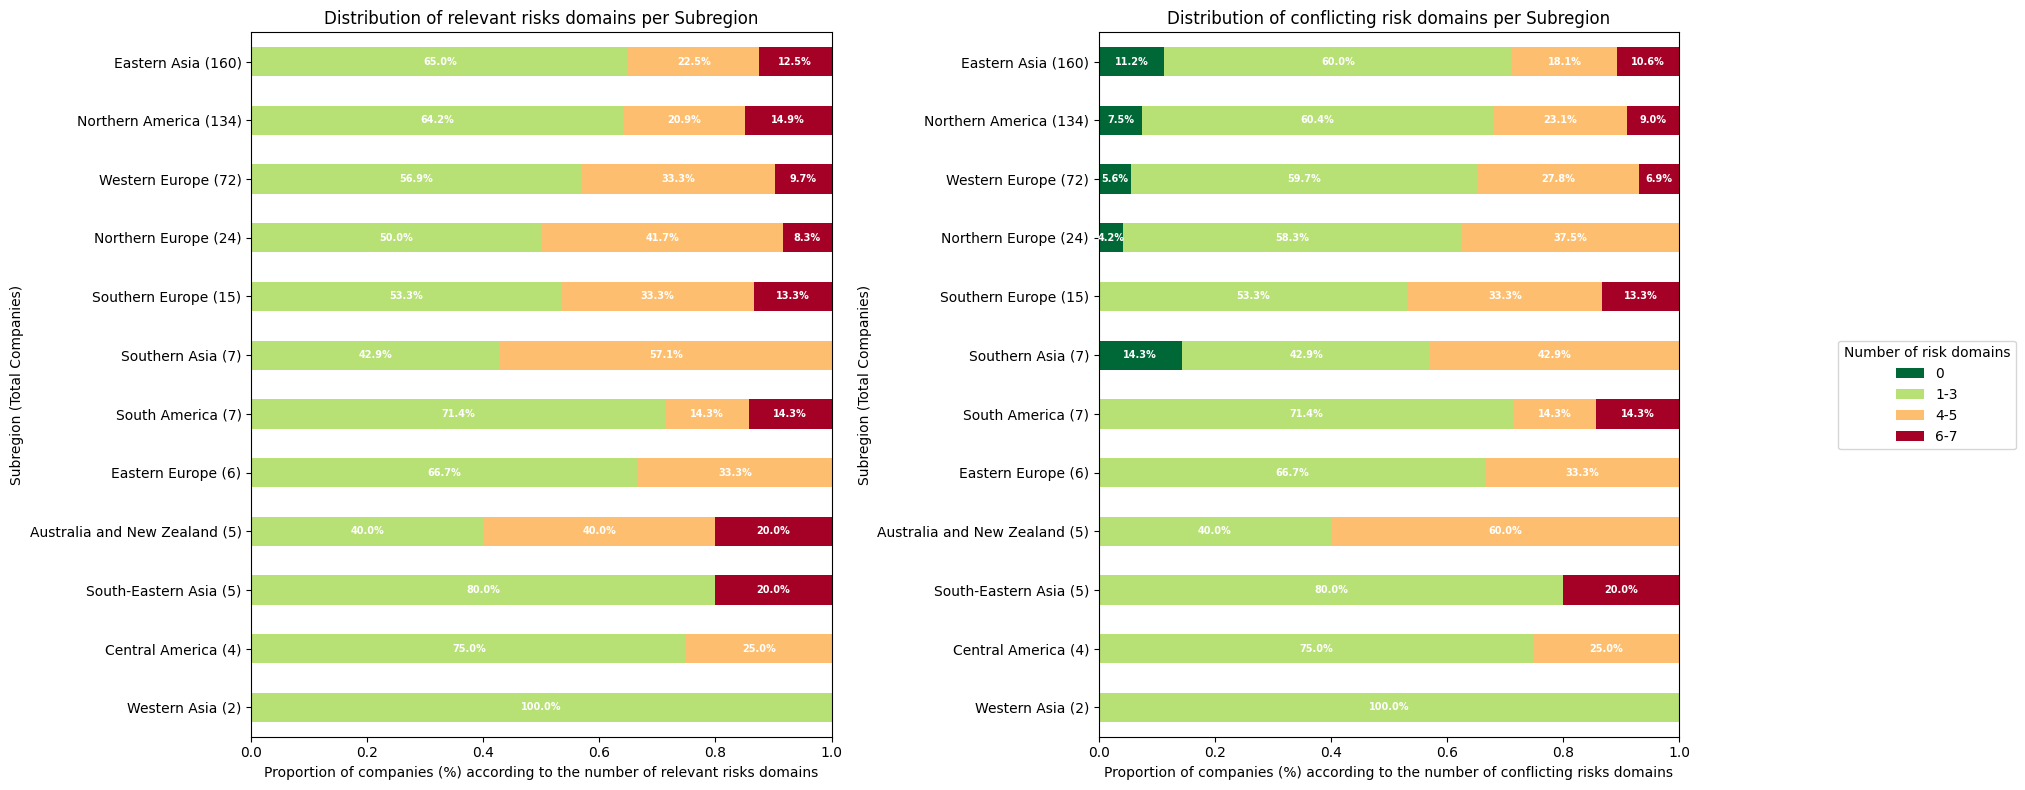

In [9]:
# Calculate the total number of companies per subregion
subregion_totals = rag_df.dropna(subset=['SUBREGION']).groupby('SUBREGION').size().reset_index(name='total_companies')


# Calculate proportions for selected risk domains per subregion and category
risk_domains_counts_with_totals = risk_domains_counts.merge(subregion_totals, on='SUBREGION', how='left')
risk_domains_counts_with_totals['proportion'] = risk_domains_counts_with_totals['count'] / risk_domains_counts_with_totals['total_companies']

# Calculate proportions for conflicting risk domains per subregion and category
risks_miss_counts_with_totals = risks_miss_counts.merge(subregion_totals, on='SUBREGION', how='left')
risks_miss_counts_with_totals['proportion'] = risks_miss_counts_with_totals['count'] / risks_miss_counts_with_totals['total_companies']


# Combine the two dataframes for easier melting and plotting
risk_domains_counts_with_totals['risk_type'] = 'Selected Risks'
risks_miss_counts_with_totals['risk_type'] = 'Conflicting Risks'

combined_risks_df = pd.concat([risk_domains_counts_with_totals, risks_miss_counts_with_totals])

# Create a combined label for the y-axis including the total count
combined_risks_df['Subregion_Label'] = combined_risks_df['SUBREGION'] + ' (' + combined_risks_df['total_companies'].astype(str) + ')'

# Melt the combined dataframe for stacked bar plotting
selected_data_pivot = combined_risks_df[combined_risks_df['risk_type'] == 'Selected Risks'].pivot_table(index='Subregion_Label', columns='risk_domains_category', values='proportion', fill_value=0)
conflicting_data_pivot = combined_risks_df[combined_risks_df['risk_type'] == 'Conflicting Risks'].pivot_table(index='Subregion_Label', columns='risks_miss_category', values='proportion', fill_value=0)


# Define the order of risk categories for stacking
risk_category_order = ['0', '1-3', '4-5', '6-7'] # Updated category order
selected_data_pivot = selected_data_pivot[risk_category_order]
conflicting_data_pivot = conflicting_data_pivot[risk_category_order]


# Sort the data by total companies in descending order for plotting
plot_order = subregion_totals.sort_values('total_companies', ascending=True)['SUBREGION'].tolist()
# Reindex the pivoted dataframes based on this order, using the Subregion_Label
selected_data_pivot = selected_data_pivot.reindex([subregion + ' (' + str(subregion_totals[subregion_totals['SUBREGION'] == subregion]['total_companies'].iloc[0]) + ')' for subregion in plot_order])
conflicting_data_pivot = conflicting_data_pivot.reindex([subregion + ' (' + str(subregion_totals[subregion_totals['SUBREGION'] == subregion]['total_companies'].iloc[0]) + ')' for subregion in plot_order])


fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 row, 2 columns

cmap = 'RdYlGn_r'

# Plot for relevant risks
selected_data_pivot.plot(kind='barh', stacked=True, ax=axes[0], colormap=cmap, legend=False) # Removed legend here
axes[0].set_title('Distribution of relevant risks domains per Subregion')
axes[0].set_xlabel('Proportion of companies (%) according to the number of relevant risks domains')
axes[0].set_ylabel('Subregion (Total Companies)')
axes[0].set_xlim(0, 1) # Set x-axis limit to 0-1 for 100% stacked bar


# Plot for conflicting risks
conflicting_data_pivot.plot(kind='barh', stacked=True, ax=axes[1], colormap=cmap, legend=False) # Removed legend here
axes[1].set_title('Distribution of conflicting risk domains per Subregion')
axes[1].set_xlabel('Proportion of companies (%) according to the number of conflicting risks domains')
axes[1].set_ylabel('Subregion (Total Companies)')
axes[1].set_xlim(0, 1)


# Add percentage labels to the bars
for ax in axes:
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            if width > 0.01:
                ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
                        f'{width*100:.1f}%',
                        ha='center', va='center', color='white', fontsize=7, fontweight='bold')


# Single legend
handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, title='Number of risk domains', bbox_to_anchor=(1.02, 0.5), loc='center left')


plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('risk_domain_distribution_stacked_bars_subregion.png', bbox_extra_artists=(legend,), bbox_inches='tight', dpi=500) # Include legend in saved figure
plt.show()

**Sector**

/tmp/ipython-input-2391946841.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_domains_counts_sector = rag_df.groupby(['Sector', 'risk_domains_category']).size().reset_index(name='count')
/tmp/ipython-input-2391946841.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risks_miss_counts_sector = rag_df.groupby(['Sector', 'risks_miss_category']).size().reset_index(name='count')
/tmp/ipython-input-2391946841.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the 

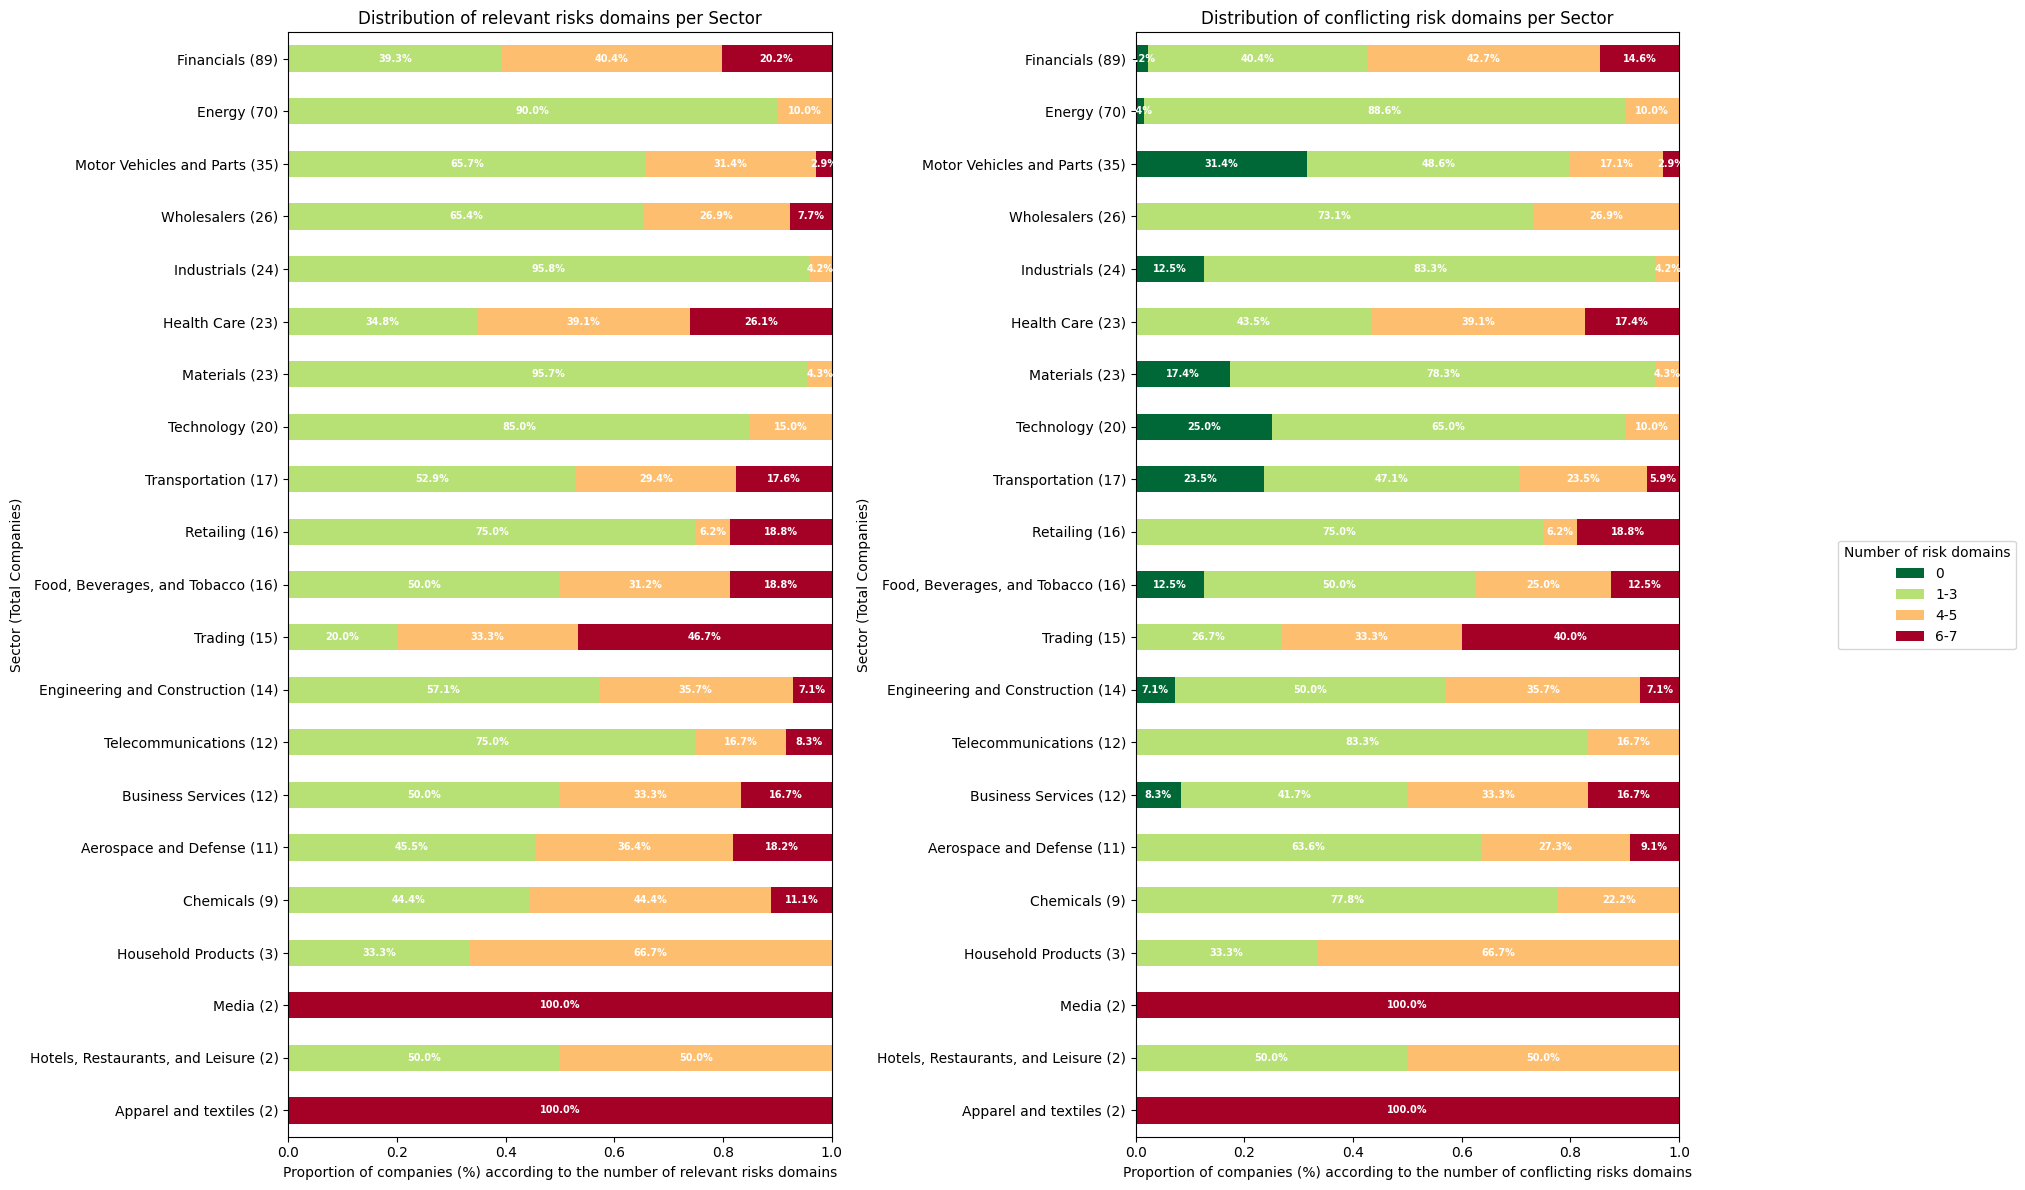

In [11]:
# Add risk category columns to rag_df_geo
bins = [-1, 0, 3, 5, 7]
labels = ['0', '1-3', '4-5', '6-7']
rag_df_geo['risk_domains_category'] = pd.cut(rag_df_geo['num_risks_domains_k10'], bins=bins, labels=labels, right=True)
rag_df_geo['risks_miss_category'] = pd.cut(rag_df_geo['num_risks_miss_k10'], bins=bins, labels=labels, right=True)

#the same process as used in subregions
sector_totals = rag_df_geo.dropna(subset=['Sector']).groupby('Sector').size().reset_index(name='total_companies')

risk_domains_counts_sector = rag_df_geo.groupby(['Sector', 'risk_domains_category']).size().reset_index(name='count')

risks_miss_counts_sector = rag_df_geo.groupby(['Sector', 'risks_miss_category']).size().reset_index(name='count')

risk_domains_counts_sector_with_totals = risk_domains_counts_sector.merge(sector_totals, on='Sector', how='left')
risk_domains_counts_sector_with_totals['proportion'] = risk_domains_counts_sector_with_totals['count'] / risk_domains_counts_sector_with_totals['total_companies']

risks_miss_counts_sector_with_totals = risks_miss_counts_sector.merge(sector_totals, on='Sector', how='left')
risks_miss_counts_sector_with_totals['proportion'] = risks_miss_counts_sector_with_totals['count'] / risks_miss_counts_sector_with_totals['total_companies']



risk_domains_counts_sector_with_totals['risk_type'] = 'Selected Risks'
risks_miss_counts_sector_with_totals['risk_type'] = 'Conflicting Risks'

combined_risks_sector_df = pd.concat([risk_domains_counts_sector_with_totals, risks_miss_counts_sector_with_totals])

combined_risks_sector_df['Sector_Label'] = combined_risks_sector_df['Sector'] + ' (' + combined_risks_sector_df['total_companies'].astype(str) + ')'

selected_data_sector_pivot = combined_risks_sector_df[combined_risks_sector_df['risk_type'] == 'Selected Risks'].pivot_table(index='Sector_Label', columns='risk_domains_category', values='proportion', fill_value=0)
conflicting_data_sector_pivot = combined_risks_sector_df[combined_risks_sector_df['risk_type'] == 'Conflicting Risks'].pivot_table(index='Sector_Label', columns='risks_miss_category', values='proportion', fill_value=0)

risk_category_order = ['0', '1-3', '4-5', '6-7']
selected_data_sector_pivot = selected_data_sector_pivot[risk_category_order]
conflicting_data_sector_pivot = conflicting_data_sector_pivot[risk_category_order]


plot_order_sector = sector_totals.sort_values('total_companies', ascending=True)['Sector'].tolist()
selected_data_sector_pivot = selected_data_sector_pivot.reindex([sector + ' (' + str(sector_totals[sector_totals['Sector'] == sector]['total_companies'].iloc[0]) + ')' for sector in plot_order_sector])
conflicting_data_sector_pivot = conflicting_data_sector_pivot.reindex([sector + ' (' + str(sector_totals[sector_totals['Sector'] == sector]['total_companies'].iloc[0]) + ')' for sector in plot_order_sector])



fig, axes = plt.subplots(1, 2, figsize=(18, 12))


cmap = 'RdYlGn_r'

selected_data_sector_pivot.plot(kind='barh', stacked=True, ax=axes[0], colormap=cmap, legend=False)
axes[0].set_title('Distribution of relevant risks domains per Sector')
axes[0].set_xlabel('Proportion of companies (%) according to the number of relevant risks domains')
axes[0].set_ylabel('Sector (Total Companies)')
axes[0].set_xlim(0, 1)


conflicting_data_sector_pivot.plot(kind='barh', stacked=True, ax=axes[1], colormap=cmap, legend=False)
axes[1].set_title('Distribution of conflicting risk domains per Sector')
axes[1].set_xlabel('Proportion of companies (%) according to the number of conflicting risks domains')
axes[1].set_ylabel('Sector (Total Companies)')
axes[1].set_xlim(0, 1)



for ax in axes:
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()

            if width > 0.01:
                ax.text(bar.get_x() + width/2, bar.get_y() + bar.get_height()/2,
                        f'{width*100:.1f}%',
                        ha='center', va='center', color='white', fontsize=7, fontweight='bold')



handles, labels = axes[0].get_legend_handles_labels()
legend = fig.legend(handles, labels, title='Number of risk domains', bbox_to_anchor=(1.02, 0.5), loc='center left') # Added legend object


plt.tight_layout(rect=[0, 0, 0.95, 1])
plt.savefig('risk_domain_distribution_stacked_bars_sector.png', bbox_extra_artists=(legend,), bbox_inches='tight',dpi=500) # Include legend in saved figure
plt.show()

In [ ]:
mit_risks = pd.read_excel('Missions.xlsx', sheet_name="MIT_domain")
mit_domains = "\n".join(mit_risks["Domain"])
mit_descriptions = "\n".join(
    f"{row['Domain']}: {row['Description']}" for _, row in mit_risks.iterrows()
)

## **Heatmap**

A heatmap per subregion and sector showing per risk domain the proportion of companies that have that risk domains as one of the conflicting risks with their mission.

**Identified risks per subregion**

In [ ]:
#'SUBREGION' column as the primary grouping variable.
exploded_df = rag_df_geo.dropna(subset=['SUBREGION', 'risks_dom_docs_k10']).explode('risks_dom_docs_k10')

# Total number of companies per subregion
subregion_totals = rag_df_geo.dropna(subset=['SUBREGION']).groupby('SUBREGION').size()
domain_counts_crosstab = pd.crosstab(exploded_df['SUBREGION'], exploded_df['risks_dom_docs_k10'])

#proportions
proportion_crosstab = domain_counts_crosstab.div(subregion_totals, axis=0)

all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab = proportion_crosstab.reindex(columns=all_possible_domains, fill_value=0)

#Normalize proportions
proportion_crosstab_percentage = proportion_crosstab * 100

print("--- Proportion (%) of Companies by Domain and Subregion ---")
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 1000,
                       'display.float_format', '{:.1f}'.format):
    print(proportion_crosstab_percentage)

--- Proportion (%) of Companies by Domain and Subregion ---
risks_dom_docs_k10         Discrimination & Toxicity  Misinformation  Privacy & Security  Malicious actors  Human- Computer Interaction  Socioeconomic & Environmental  AI system safety, failures, & limitations
SUBREGION                                                                                                                                                                                                        
Australia and New Zealand                       20.0            60.0                80.0              80.0                         20.0                           60.0                                      100.0
Central America                                  0.0             0.0               100.0              50.0                          0.0                           75.0                                      100.0
Eastern Asia                                    19.4            13.8                83.8            

/tmp/ipython-input-2797933426.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_data = (proportion_crosstab_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%') # Corrected format string here


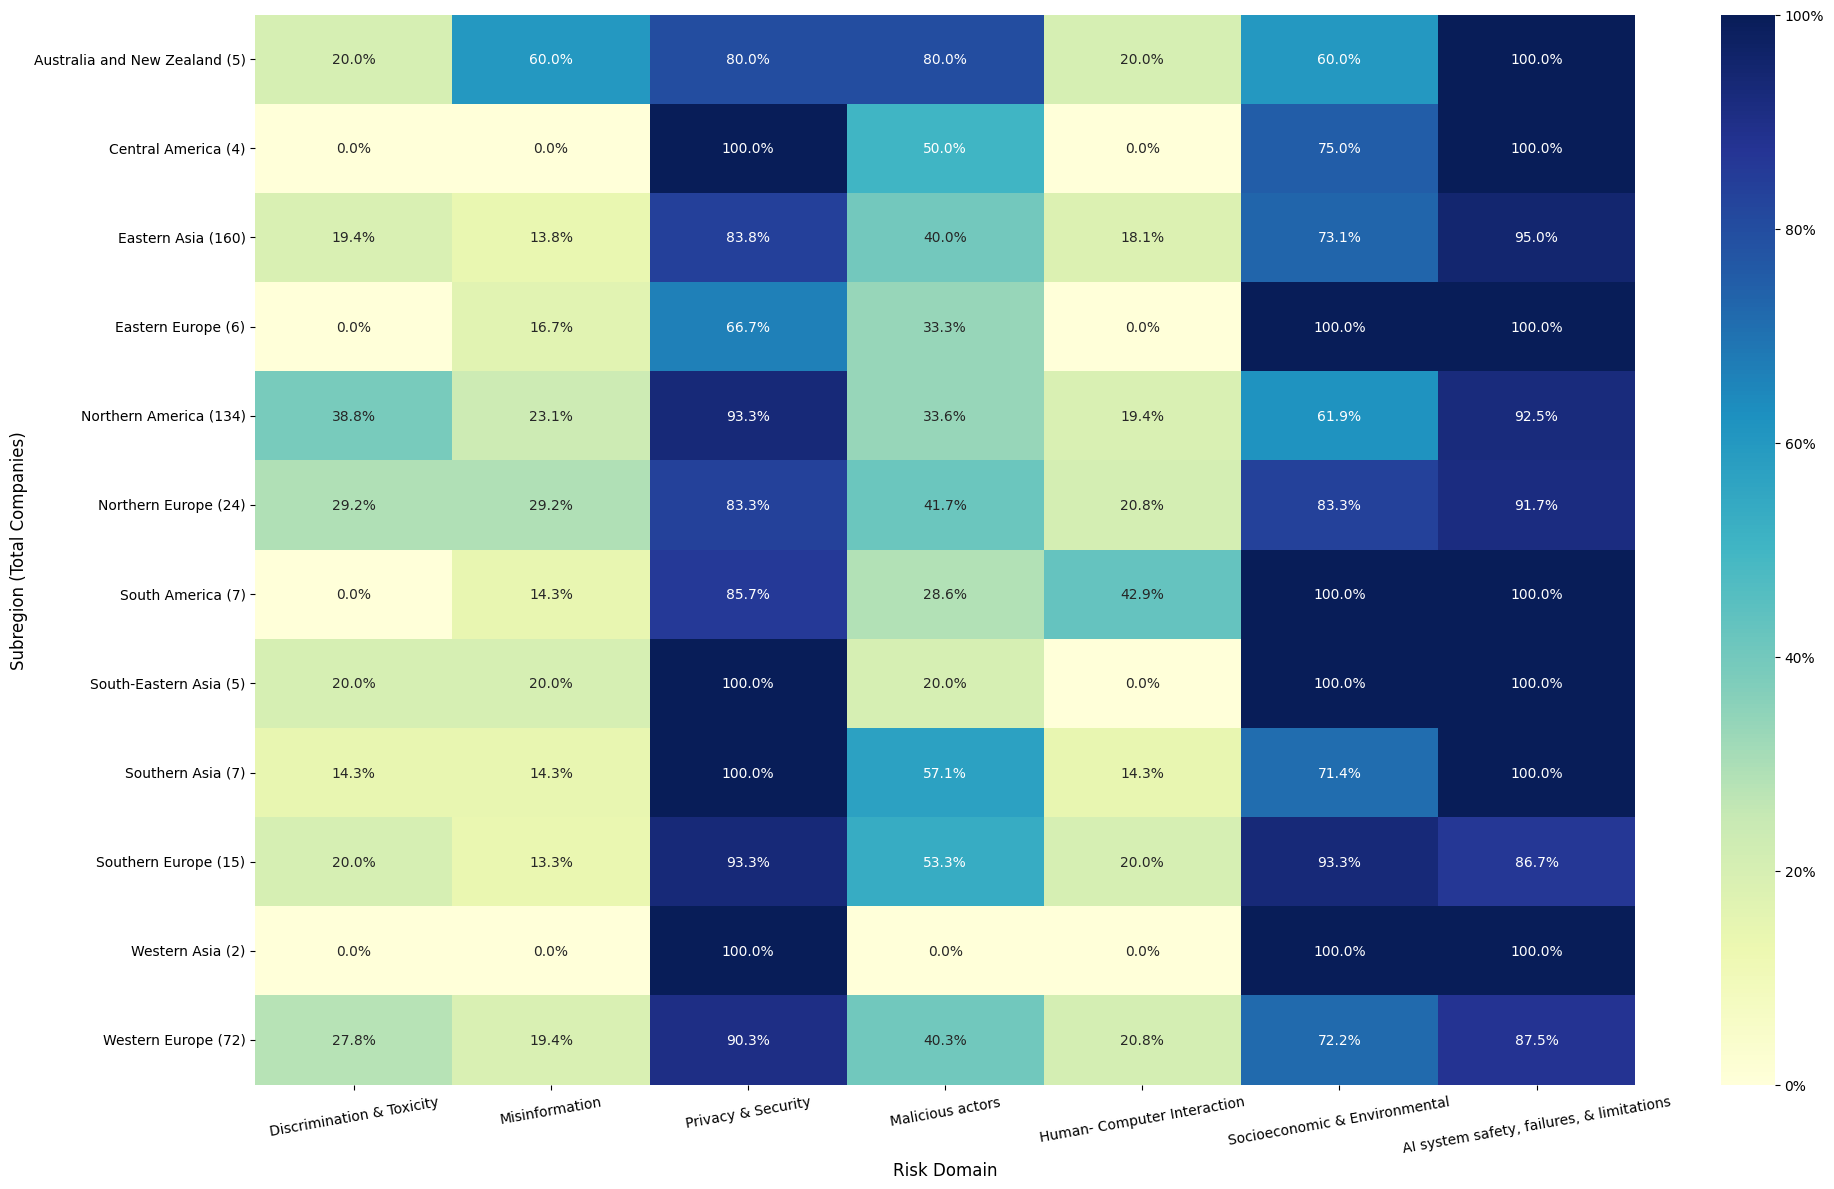

In [ ]:
exploded_df = rag_df_geo.dropna(subset=['SUBREGION', 'risks_dom_docs_k10']).explode('risks_dom_docs_k10')
subregion_totals = rag_df_geo.dropna(subset=['SUBREGION']).groupby('SUBREGION').size()
domain_counts_crosstab = pd.crosstab(exploded_df['SUBREGION'], exploded_df['risks_dom_docs_k10'])
proportion_crosstab = domain_counts_crosstab.div(subregion_totals, axis=0)
all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab = proportion_crosstab.reindex(columns=all_possible_domains, fill_value=0)

# Add total company counts to the proportion_crosstab DataFrame for labeling
proportion_crosstab_with_totals = proportion_crosstab.copy()
proportion_crosstab_with_totals['total_companies'] = subregion_totals
proportion_crosstab_with_totals['Subregion_Label'] = proportion_crosstab_with_totals.index + ' (' + proportion_crosstab_with_totals['total_companies'].astype(str) + ')'

# Set the index to the new combined label for plotting
proportion_crosstab_with_totals = proportion_crosstab_with_totals.set_index('Subregion_Label')

# Drop the original 'total_companies' column as it's not needed for the heatmap values
proportion_crosstab_with_totals = proportion_crosstab_with_totals.drop(columns=['total_companies'])

# Multiply by 100 and format as string with one decimal place and '%'
annotation_data = (proportion_crosstab_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%') # Corrected format string here




plt.figure(figsize=(20, 12))

sns.heatmap(
    proportion_crosstab_with_totals[all_possible_domains] * 100, # Data for the heatmap colors
    cmap='YlGnBu',
    vmin=0,
    vmax=100, # Set vmax to 100 for percentage scale
    annot=annotation_data, # Use the pre-formatted annotation data
    fmt='', # Set fmt to empty string since annotations are pre-formatted
    cbar_kws={'format': '%.0f%%'} # Format color bar labels as percentages
)


plt.xlabel('Risk Domain', fontsize=12)
plt.ylabel('Subregion (Total Companies)', fontsize=12) # Update y-label


plt.xticks(rotation=10, ha='center')
plt.tight_layout()

plt.savefig('heatmap_risk_domain_subregion.png', format='png')

plt.show()

**Conflicting risks per subregion**

In [ ]:
exploded_df = rag_df_geo.dropna(subset=['SUBREGION', 'risks_miss_docs_k10']).explode('risks_miss_docs_k10')
subregion_totals = rag_df_geo.dropna(subset=['SUBREGION']).groupby('SUBREGION').size()

domain_counts_crosstab = pd.crosstab(exploded_df['SUBREGION'], exploded_df['risks_miss_docs_k10'])
proportion_crosstab = domain_counts_crosstab.div(subregion_totals, axis=0)
all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab = proportion_crosstab.reindex(columns=all_possible_domains, fill_value=0)

proportion_crosstab_percentage = proportion_crosstab * 100



print("--- Proportion of Companies by Domain and Subregion ---")

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 1000,
                       'display.float_format', '{:.1f}'.format):
    print(proportion_crosstab_percentage)

--- Proportion of Companies by Domain and Subregion ---
risks_miss_docs_k10        Discrimination & Toxicity  Misinformation  Privacy & Security  Malicious actors  Human- Computer Interaction  Socioeconomic & Environmental  AI system safety, failures, & limitations
SUBREGION                                                                                                                                                                                                        
Australia and New Zealand                       20.0            60.0                80.0              80.0                          0.0                           60.0                                       80.0
Central America                                  0.0             0.0               100.0              50.0                          0.0                           75.0                                       50.0
Eastern Asia                                    14.4            12.5                52.5              36

/tmp/ipython-input-3598056724.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_data_miss = (proportion_crosstab_miss_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%')


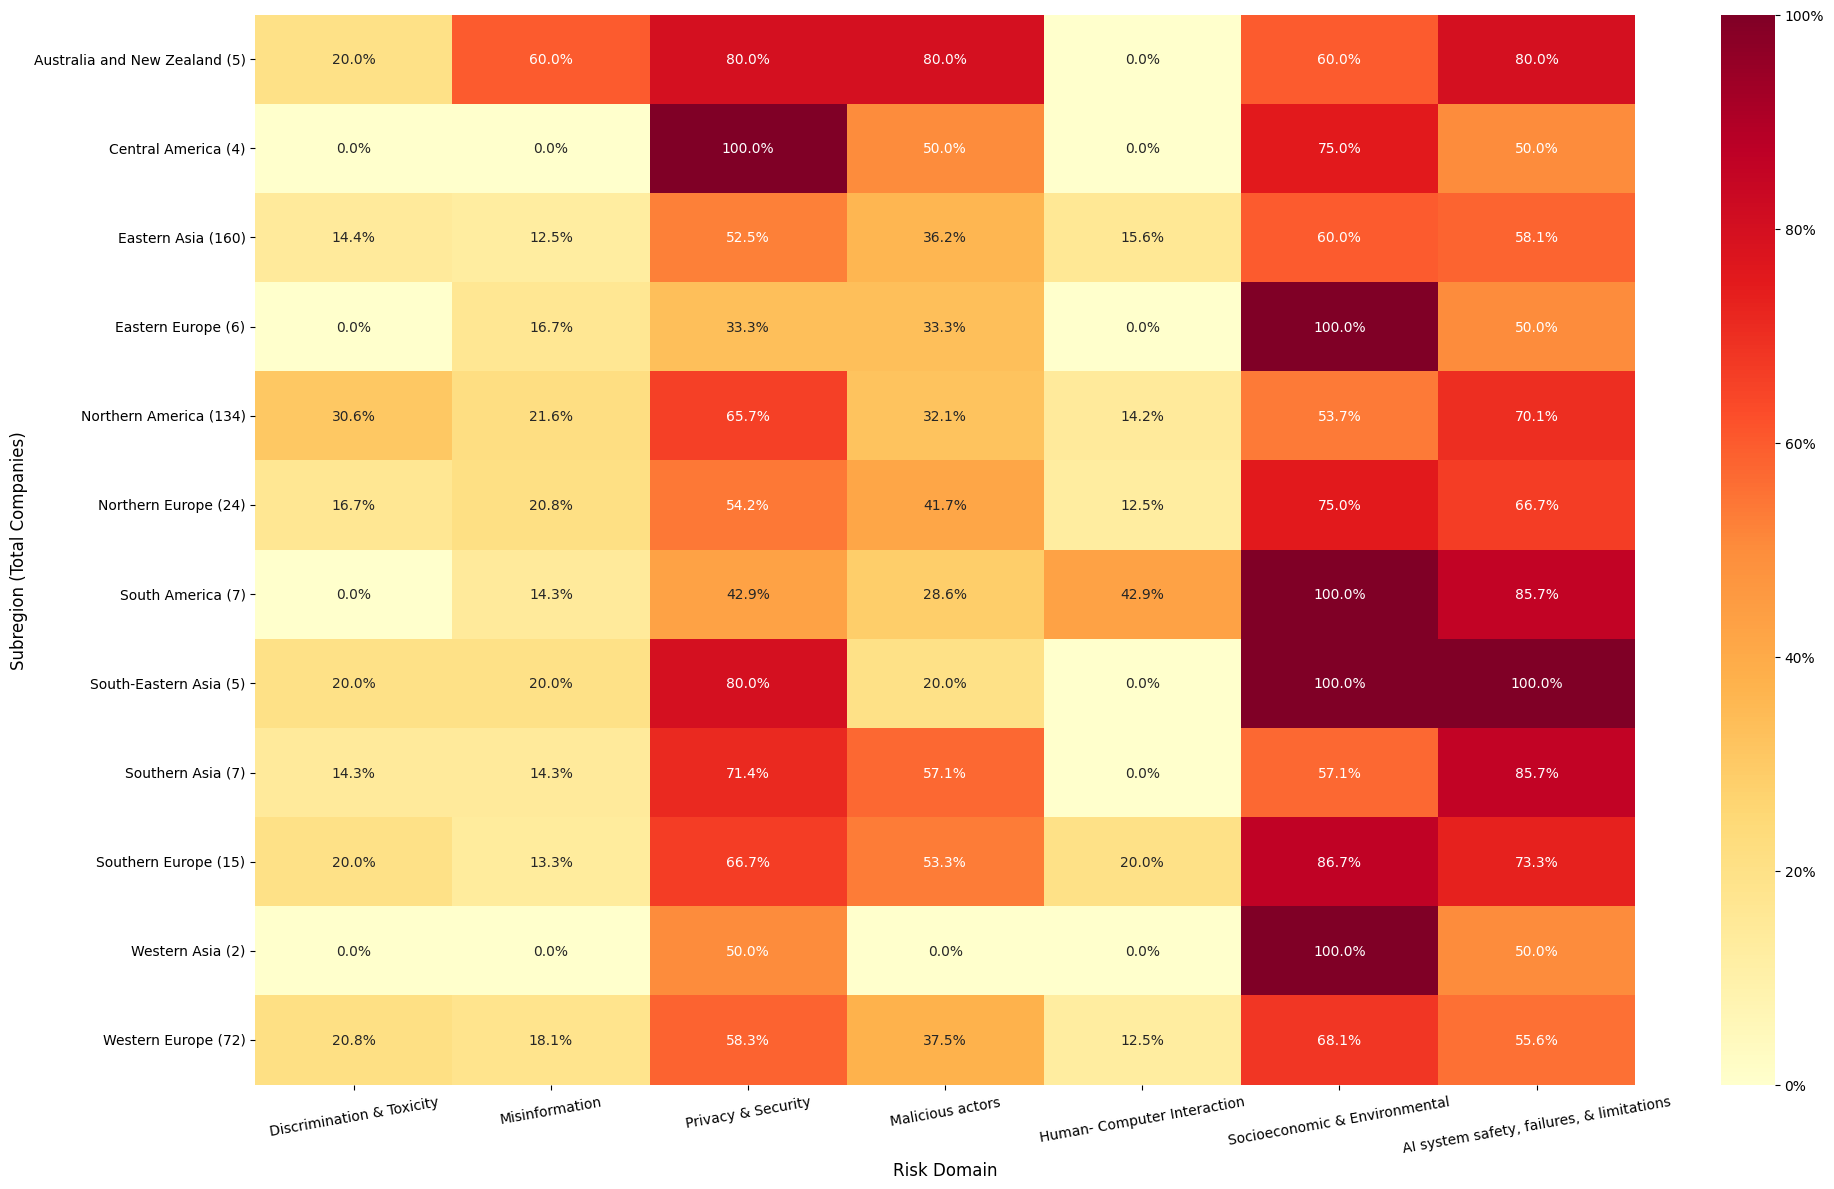

In [ ]:
exploded_df_miss = rag_df_geo.dropna(
    subset=['SUBREGION', 'risks_miss_docs_k10']
).explode('risks_miss_docs_k10')
subregion_totals = rag_df_geo.dropna(subset=['SUBREGION']).groupby('SUBREGION').size()

domain_counts_crosstab_miss = pd.crosstab(
    exploded_df_miss['SUBREGION'],
    exploded_df_miss['risks_miss_docs_k10']
)

proportion_crosstab_miss = domain_counts_crosstab_miss.div(subregion_totals, axis=0)

all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab_miss = proportion_crosstab_miss.reindex(columns=all_possible_domains, fill_value=0)

proportion_crosstab_miss_with_totals = proportion_crosstab_miss.copy()
proportion_crosstab_miss_with_totals['total_companies'] = subregion_totals
proportion_crosstab_miss_with_totals['Subregion_Label'] = proportion_crosstab_miss_with_totals.index + ' (' + proportion_crosstab_miss_with_totals['total_companies'].astype(str) + ')'

proportion_crosstab_miss_with_totals = proportion_crosstab_miss_with_totals.set_index('Subregion_Label')

proportion_crosstab_miss_with_totals = proportion_crosstab_miss_with_totals.drop(columns=['total_companies'])

annotation_data_miss = (proportion_crosstab_miss_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%')


plt.figure(figsize=(20, 12))

sns.heatmap(
    proportion_crosstab_miss_with_totals[all_possible_domains] * 100,
    cmap='YlOrRd',
    vmin=0,
    vmax=100,
    annot=annotation_data_miss,
    fmt='',
    cbar_kws={'format': '%.0f%%'}
)

plt.xlabel('Risk Domain', fontsize=12)
plt.ylabel('Subregion (Total Companies)', fontsize=12) # Update y-label


plt.xticks(rotation=10, ha='center')


plt.tight_layout()


plt.savefig('heatmap_conflicting_risk_domain_subregion.png', format='png')


plt.show()

**Identified risks per sector**

In [ ]:
exploded_df_sector = rag_df.dropna(
    subset=['Sector', 'risks_dom_docs_k10']
).explode('risks_dom_docs_k10')

sector_totals = rag_df.dropna(subset=['Sector']).groupby('Sector').size()

domain_counts_crosstab_sector = pd.crosstab(
    exploded_df_sector['Sector'],
    exploded_df_sector['risks_dom_docs_k10']
)

proportion_crosstab_sector = domain_counts_crosstab_sector.div(sector_totals, axis=0)

all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab_sector = proportion_crosstab_sector.reindex(columns=all_possible_domains, fill_value=0)



print("--- Proportion (%) of Companies by Selected Risk Domain and Sector ---")

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 1000,
                       'display.float_format', '{:.1f}'.format):
    print(proportion_crosstab_sector * 100)

--- Proportion (%) of Companies by Selected Risk Domain and Sector ---
risks_dom_docs_k10                Discrimination & Toxicity  Misinformation  Privacy & Security  Malicious actors  Human- Computer Interaction  Socioeconomic & Environmental  AI system safety, failures, & limitations
Sector                                                                                                                                                                                                                  
Aerospace and Defense                                   9.1            18.2               100.0              81.8                         36.4                           36.4                                      100.0
Apparel and textiles                                  100.0           100.0               100.0             100.0                        100.0                          100.0                                      100.0
Business Services                                      16.7  

/tmp/ipython-input-1255971575.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_data_sector = (proportion_crosstab_sector_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%')


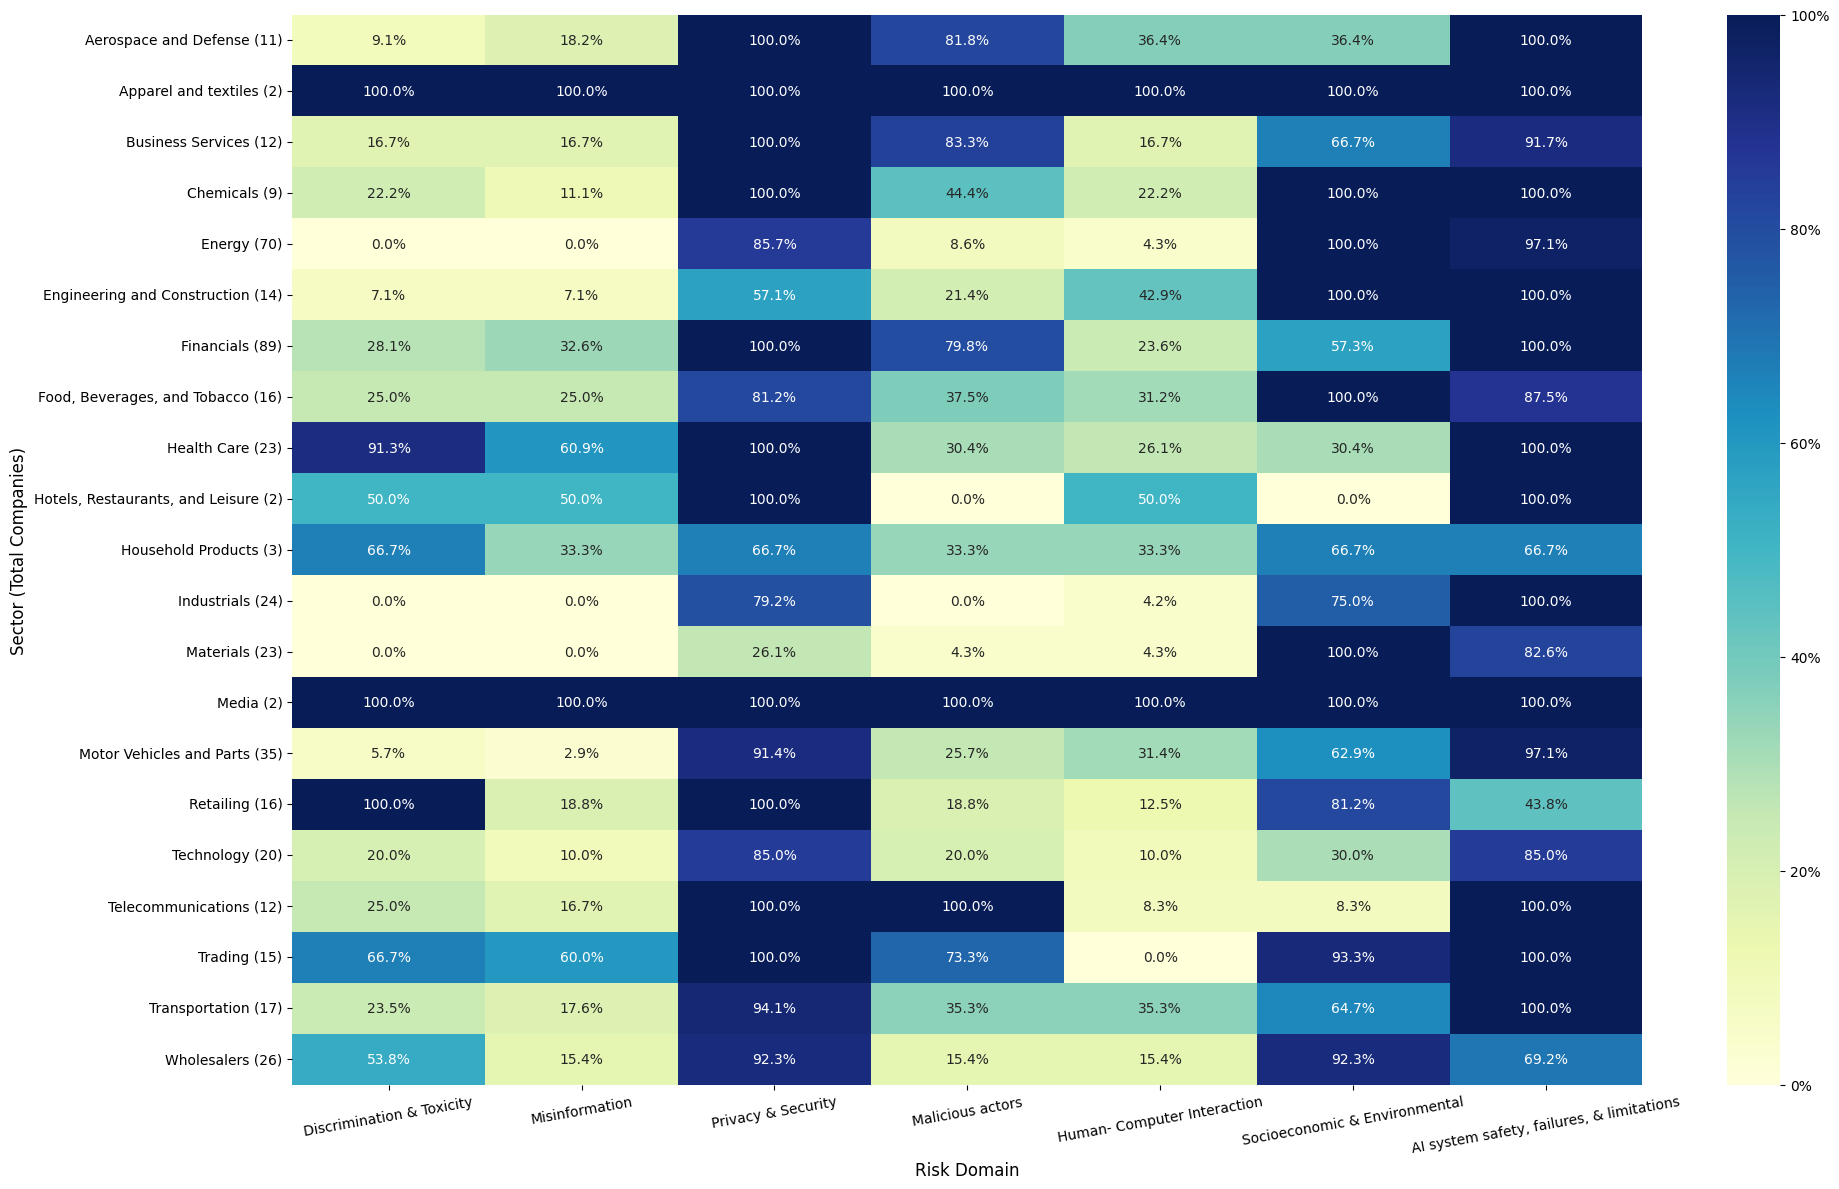

In [ ]:
exploded_df_sector = rag_df_geo.dropna(
    subset=['Sector', 'risks_dom_docs_k10']
).explode('risks_dom_docs_k10')


sector_totals = rag_df_geo.dropna(subset=['Sector']).groupby('Sector').size()


domain_counts_crosstab_sector = pd.crosstab(
    exploded_df_sector['Sector'],
    exploded_df_sector['risks_dom_docs_k10']
)


proportion_crosstab_sector = domain_counts_crosstab_sector.div(sector_totals, axis=0)


all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab_sector = proportion_crosstab_sector.reindex(columns=all_possible_domains, fill_value=0)


proportion_crosstab_sector_with_totals = proportion_crosstab_sector.copy()
proportion_crosstab_sector_with_totals['total_companies'] = sector_totals
proportion_crosstab_sector_with_totals['Sector_Label'] = proportion_crosstab_sector_with_totals.index + ' (' + proportion_crosstab_sector_with_totals['total_companies'].astype(str) + ')'


proportion_crosstab_sector_with_totals = proportion_crosstab_sector_with_totals.set_index('Sector_Label')


proportion_crosstab_sector_with_totals = proportion_crosstab_sector_with_totals.drop(columns=['total_companies'])



annotation_data_sector = (proportion_crosstab_sector_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%')

plt.figure(figsize=(20, 12))


sns.heatmap(
    proportion_crosstab_sector_with_totals[all_possible_domains] * 100,
    cmap='YlGnBu',
    vmin=0,
    vmax=100,
    annot=annotation_data_sector,
    fmt='',
    cbar_kws={'format': '%.0f%%'}
)


plt.xlabel('Risk Domain', fontsize=12)
plt.ylabel('Sector (Total Companies)', fontsize=12)


plt.xticks(rotation=10, ha='center')


plt.tight_layout()


plt.savefig('heatmap_selected_risk_domain_sector.png', format='png')


plt.show()

**Conflicting risks per sector**

In [ ]:
exploded_df_sector = rag_df.dropna(
    subset=['Sector', 'risks_miss_docs_k10']
).explode('risks_miss_docs_k10')

sector_totals = rag_df.dropna(subset=['Sector']).groupby('Sector').size()

domain_counts_crosstab_sector = pd.crosstab(
    exploded_df_sector['Sector'],
    exploded_df_sector['risks_miss_docs_k10']
)

proportion_crosstab_sector = domain_counts_crosstab_sector.div(sector_totals, axis=0)

all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab_sector = proportion_crosstab_sector.reindex(columns=all_possible_domains, fill_value=0)



print("--- Proportion (%) of Companies by Conflicting Risk Domain and Sector ---")

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 1000,
                       'display.float_format', '{:.1f}'.format):
    print(proportion_crosstab_sector * 100)

--- Proportion (%) of Companies by Conflicting Risk Domain and Sector ---
risks_miss_docs_k10               Discrimination & Toxicity  Misinformation  Privacy & Security  Malicious actors  Human- Computer Interaction  Socioeconomic & Environmental  AI system safety, failures, & limitations
Sector                                                                                                                                                                                                                  
Aerospace and Defense                                   0.0            18.2                54.5              81.8                         36.4                           27.3                                       72.7
Apparel and textiles                                  100.0           100.0               100.0             100.0                        100.0                          100.0                                      100.0
Business Services                                      16.

/tmp/ipython-input-3293748597.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotation_data_sector = (proportion_crosstab_sector_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%')


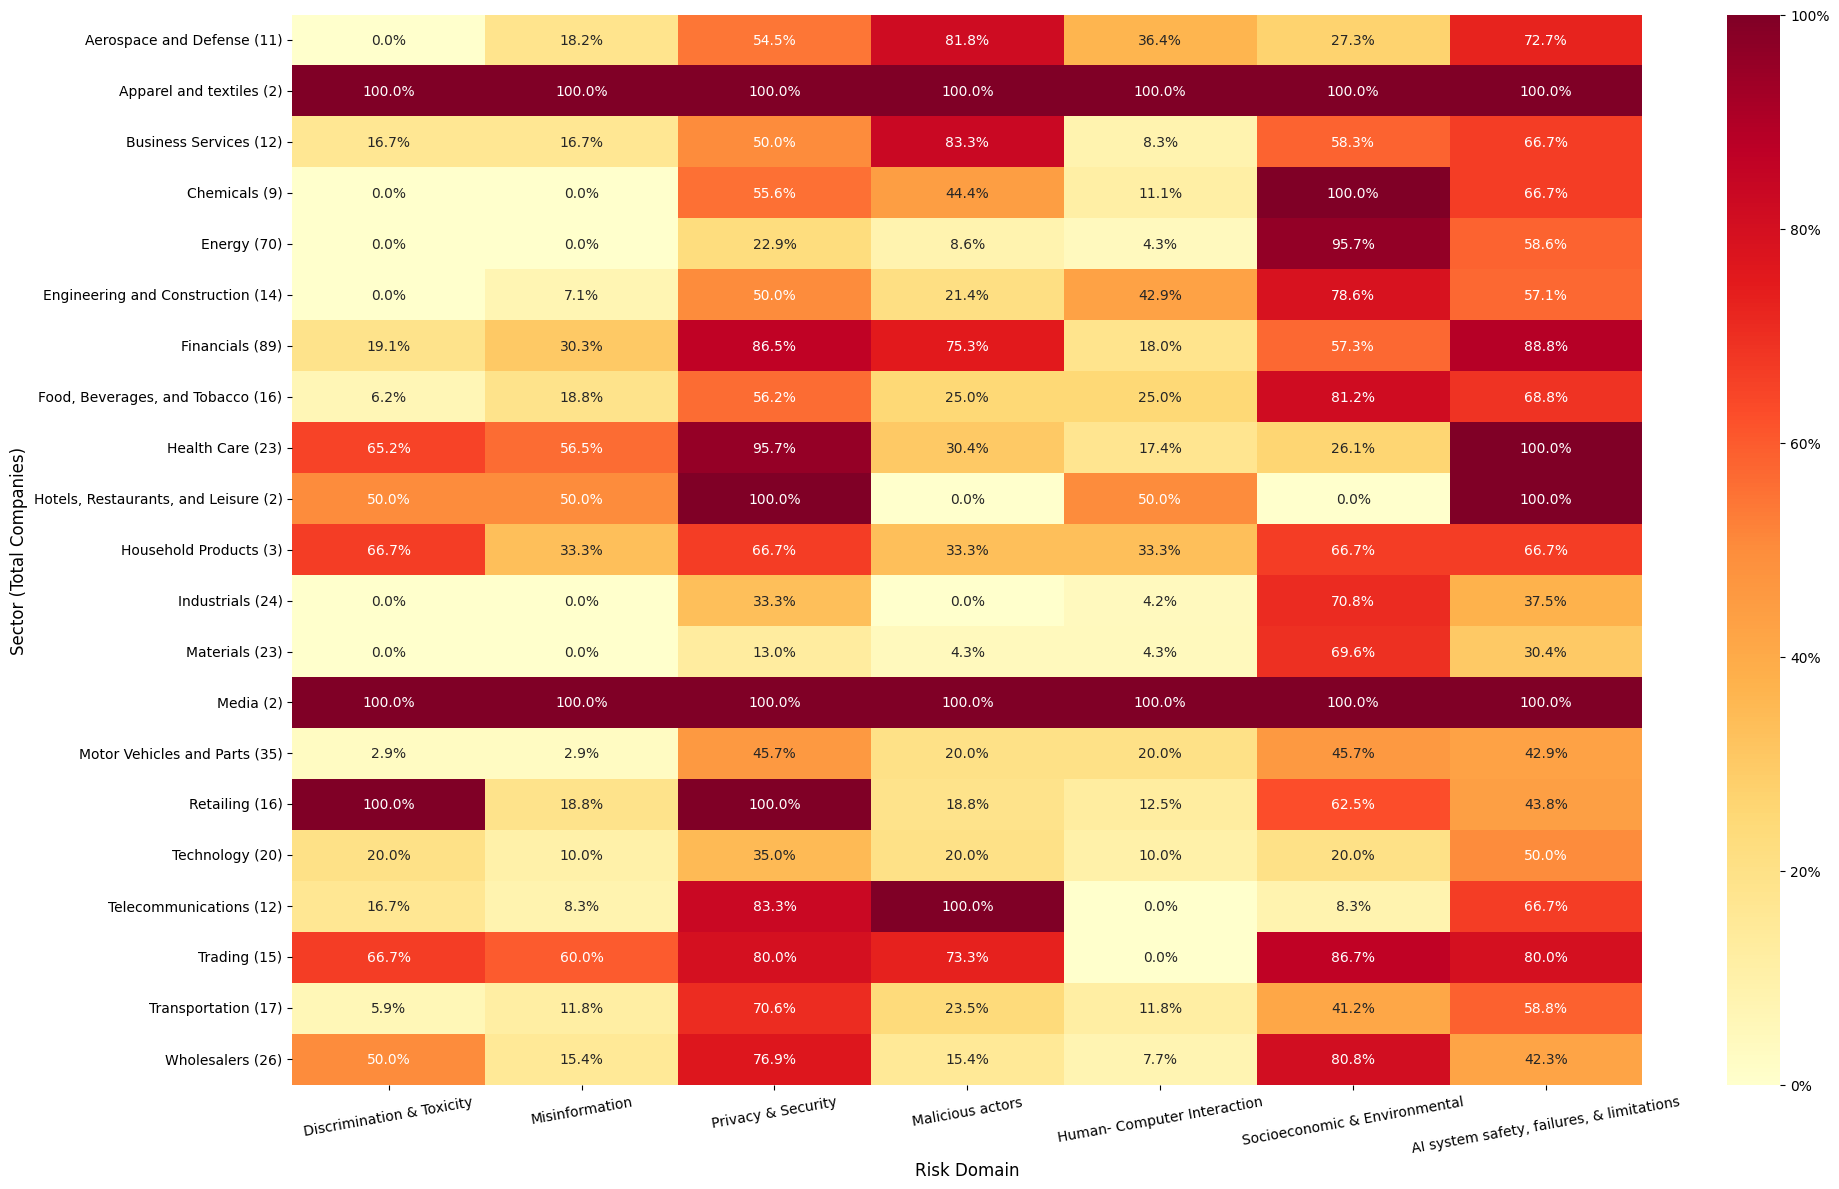

In [ ]:
exploded_df_sector = rag_df.dropna(
    subset=['Sector', 'risks_miss_docs_k10']
).explode('risks_miss_docs_k10') # Using the specified risk column


sector_totals = rag_df.dropna(subset=['Sector']).groupby('Sector').size()

domain_counts_crosstab_sector = pd.crosstab(
    exploded_df_sector['Sector'],
    exploded_df_sector['risks_miss_docs_k10']
)


proportion_crosstab_sector = domain_counts_crosstab_sector.div(sector_totals, axis=0)


all_possible_domains = mit_risks["Domain"].unique()
proportion_crosstab_sector = proportion_crosstab_sector.reindex(columns=all_possible_domains, fill_value=0)

proportion_crosstab_sector_with_totals = proportion_crosstab_sector.copy()
proportion_crosstab_sector_with_totals['total_companies'] = sector_totals
proportion_crosstab_sector_with_totals['Sector_Label'] = proportion_crosstab_sector_with_totals.index + ' (' + proportion_crosstab_sector_with_totals['total_companies'].astype(str) + ')'


proportion_crosstab_sector_with_totals = proportion_crosstab_sector_with_totals.set_index('Sector_Label')


proportion_crosstab_sector_with_totals = proportion_crosstab_sector_with_totals.drop(columns=['total_companies'])

annotation_data_sector = (proportion_crosstab_sector_with_totals[all_possible_domains] * 100).applymap(lambda x: f'{x:.1f}%')



plt.figure(figsize=(20, 12))

sns.heatmap(
    proportion_crosstab_sector_with_totals[all_possible_domains] * 100,
    cmap='YlOrRd',
    vmin=0,
    vmax=100,
    annot=annotation_data_sector,
    fmt='',
    cbar_kws={'format': '%.0f%%'}
)


plt.xlabel('Risk Domain', fontsize=12)
plt.ylabel('Sector (Total Companies)', fontsize=12)


plt.xticks(rotation=10, ha='center')


plt.tight_layout()


plt.savefig('heatmap_conflicting_risk_domain_sector.png', format='png')


plt.show()

**Review of notable sectors**

In [ ]:
filtered_df = rag_df[rag_df['Sector'].isin(['Apparel and textiles', 'Media'])]


with pd.option_context('display.max_colwidth', None):
    print("rag_docs_k10 for companies in 'Apparel and textiles' and 'Media' sectors:")
    print(filtered_df['rag_docs_k10'].to_string())

rag_docs_k10 for companies in 'Apparel and textiles' and 'Media' sectors:
59                                                                                                                                                                                                                                                                                                                                                                                                                                              {"Discrimination & Toxicity": {"Risks": ["Biased data leads to unequal treatment", "AI exposes users to harmful content"], "ConflictsMission": "yes", "Explanation": "Mission 'to entertain, inform and inspire' conflicted by biased AI outcomes, resulting in harm to diverse audiences."}, "Misinformation": {"Risks": ["AI spreads false information", "Pollution of information ecosystem"], "ConflictsMission": "yes", "Explanation": "Mission 'to inform' conflicted by AI-generated misinformation, le

In [ ]:
filtered_df = rag_df[rag_df['Sector'].isin(['Apparel and textiles', 'Media'])]

subset_df = filtered_df[['Company', 'Missions_validated', 'rag_docs_k10']]

with pd.option_context('display.max_colwidth', None):
    display(subset_df)

,Company,Missions_validated,rag_docs_k10
59,Walt Disney,"To entertain, inform and inspire people around the globe through the power of unparalleled storytelling, reflecting the iconic brands, creative minds and innovative technologies that make ours the world's premier entertainment company","{""Discrimination & Toxicity"": {""Risks"": [""Biased data leads to unequal treatment"", ""AI exposes users to harmful content""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to entertain, inform and inspire' conflicted by biased AI outcomes, resulting in harm to diverse audiences.""}, ""Misinformation"": {""Risks"": [""AI spreads false information"", ""Pollution of information ecosystem""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to inform' conflicted by AI-generated misinformation, leading to loss of trust.""}, ""Privacy & Security"": {""Risks"": [""Sensitive info leaked through AI"", ""AI system security vulnerabilities""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to inspire' conflicted by compromised user privacy and security, eroding trust in Disney's content.""}, ""Malicious actors"": {""Risks"": [""Disinformation through AI"", ""Cyberattacks on AI systems""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to entertain' conflicted by malicious use of AI for disinformation, harming audience and reputation.""}, ""Human- Computer Interaction"": {""Risks"": [""Overreliance on AI for content creation"", ""Loss of human agency in storytelling""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to inspire through unparalleled storytelling' conflicted by overreliance on AI, diminishing human creative input.""}, ""Socioeconomic & Environmental"": {""Risks"": [""Increased inequality through AI-driven content"", ""Environmental harm from AI production""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to inspire people around the globe' conflicted by AI exacerbating socioeconomic and environmental issues, affecting Disney's global audience.""}, ""AI system safety, failures, & limitations"": {""Risks"": [""AI pursuing goals conflicting with human values"", ""Lack of transparency in AI decision-making""], ""ConflictsMission"": ""yes"", ""Explanation"": ""Mission 'to entertain, inform and inspire' conflicted by unsafe or uncontrolled AI, potentially harming users and Disney's reputation.""}}"
171,Netflix,"To entertain the world, one fan at a time.","{""Discrimination & Toxicity"": {""Risks"": [""Biased data leads to unfair recommendations"", ""AI amplifies existing social inequalities""], ""ConflictsMission"": ""yes"", ""Explanation"": ""To entertain the world, one fan at a time' conflicts with biased recommendations as it may not cater to all fans equally.""}, ""Misinformation"": {""Risks"": [""AI-generated false information spreads quickly"", ""Recommendation algorithms prioritize engagement over truth""], ""ConflictsMission"": ""yes"", ""Explanation"": ""'To entertain the world, one fan at a time' conflicts with spreading misinformation as it undermines trust in Netflix's content.""}, ""Privacy & Security"": {""Risks"": [""User data leaked due to AI system vulnerabilities"", ""AI-powered tracking invades user privacy""], ""ConflictsMission"": ""yes"", ""Explanation"": ""'To entertain the world, one fan at a time' conflicts with compromising user privacy as it erodes trust in Netflix's services.""}, ""Malicious actors"": {""Risks"": [""AI systems exploited for targeted manipulation"", ""Deepfakes used to spread misinformation""], ""ConflictsMission"": ""yes"", ""Explanation"": ""'To entertain the world, one fan at a time' conflicts with malicious exploitation of AI as it harms users and damages Netflix's reputation.""}, ""Human- Computer Interaction"": {""Risks"": [""Overreliance on AI recommendations leads to loss of user autonomy"", ""AI-driven engagement strategies prioritize addiction over well-being""], ""ConflictsMission"": ""yes"", ""Explanation"": ""'